In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt


In [2]:
vocab_size = 10000  # keep top 10k most frequent words
maxlen = 200        # max review length

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to fixed length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


In [3]:

# Explicitly provide input shape  here is my problem 
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_shape=(maxlen,)),
    LSTM(128),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Now force build before summary
model.build(input_shape=(None, maxlen))
model.summary()

/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,411,713 (5.39 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

Epoch 1/5
157/157 - 59s - 376ms/step - accuracy: 0.7455 - loss: 0.5001 - val_accuracy: 0.8536 - val_loss: 0.3498
Epoch 2/5
157/157 - 59s - 374ms/step - accuracy: 0.8953 - loss: 0.2662 - val_accuracy: 0.8680 - val_loss: 0.3174
Epoch 3/5
157/157 - 59s - 373ms/step - accuracy: 0.9316 - loss: 0.1888 - val_accuracy: 0.8518 - val_loss: 0.3509
Epoch 4/5
157/157 - 62s - 395ms/step - accuracy: 0.9409 - loss: 0.1619 - val_accuracy: 0.8708 - val_loss: 0.3801
Epoch 5/5
157/157 - 65s - 417ms/step - accuracy: 0.9497 - loss: 0.1387 - val_accuracy: 0.8588 - val_loss: 0.4697


In [5]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"\n Training Accuracy: {train_acc*100:.2f}%")
print(f" Test Accuracy: {test_acc*100:.2f}%")


 Training Accuracy: 93.77%
 Test Accuracy: 84.99%


In [6]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

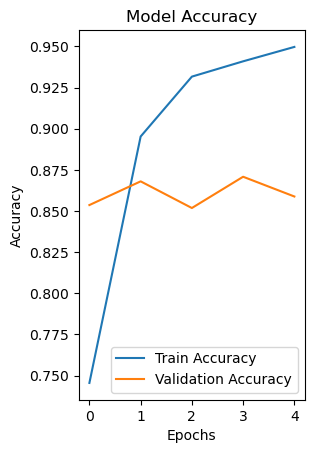

In [7]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


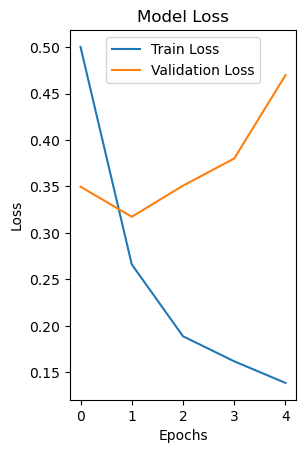

In [8]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


In [13]:
plt.show()

In [14]:
word_index = imdb.get_word_index()
reverse_word_index = {value+3: key for key, value in word_index.items()}
reverse_word_index[0] = "<PAD>"
reverse_word_index[1] = "<START>"
reverse_word_index[2] = "<UNK>"

In [15]:
def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i, "?") for i in encoded_review])


In [12]:
import random
indices = random.sample(range(len(x_test)), 5)

for i in indices:
    review = x_test[i]
    pred = model.predict(review.reshape(1, -1), verbose=0)[0][0]
    sentiment = "Positive 😀" if pred > 0.5 else "Negative 😞"
    print("\nReview:", decode_review(review))
    print("Prediction:", sentiment, f"(score={pred:.2f})")
    print("True Label:", "Positive" if y_test[i]==1 else "Negative")


Review: <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> admittedly you can put a model airplane against a black background and call it sci fi and thats enough to get me interested so if you are like that black horizon will at least get you interested before you watch it the best part of the movie is when they rehash some actual footage of a <UNK> launch br br the movie plays like the naked gun series <UNK> cop dramas with bad clichés and bad acting unfortunately i don't think they meant to be funny the actors really are made of cardboard the dialog really does suck so well just have to laugh at them and not with them br br on a side note it is rare to see a movie that takes place half in outer space half on earth and doesn't mix in the expected <UNK> and supernatural eve